In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [174]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [175]:
california = fetch_california_housing()

In [176]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [177]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


In [178]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [180]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [181]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [182]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [183]:
y = california.target
X = california.data

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [185]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [186]:
lr.score(X_train, y_train)

0.6057366101552667

In [187]:
lr.coef_

array([ 4.34422069e-01,  9.47841407e-03, -1.04951036e-01,  6.25758931e-01,
       -1.83658476e-06, -3.44195900e-03, -4.23157965e-01, -4.37849542e-01])

In [188]:
_ = [print(k, v) for k, v in zip(california.feature_names, lr.coef_)]

MedInc 0.4344220692390344
HouseAge 0.00947841407077306
AveRooms -0.10495103604913944
AveBedrms 0.6257589306894729
Population -1.836584763333713e-06
AveOccup -0.0034419589988771713
Latitude -0.4231579652400288
Longitude -0.4378495418069678


In [189]:
lr.intercept_

np.float64(-37.26322988574786)

In [190]:
y_pred = lr.predict(X_test)

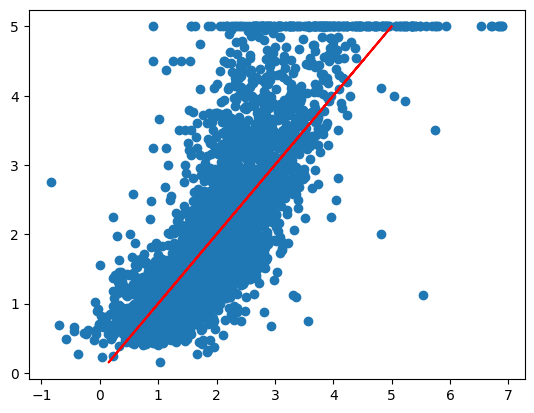

In [191]:
plt.scatter(y_pred, y_test)
plt.plot(y, y, c='r')

In [192]:
r2_score(y_test, y_pred)

0.6079109098477142

In [193]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [194]:
polynomial = LinearRegression()
polynomial.fit(X_train_poly, y_train)
y_pred_poly = polynomial.predict(X_test_poly)

In [195]:
r2_score(y_test, y_pred_poly)

0.6556899919721682

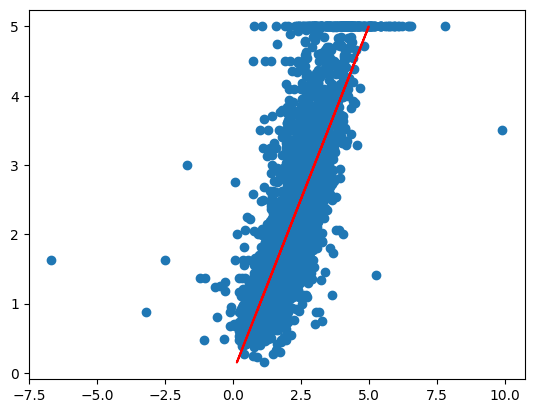

In [196]:
plt.scatter(y_pred_poly, y_test)
plt.plot(y, y, c='r')

## Задания для самостоятельного выполнения

In [197]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [198]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Метод опорных векторов (без ядра)": SVR(kernel='linear'),
        "Метод опорных векторов (гауссовое ядро)": SVR(kernel='rbf'),
        "Метод опорных векторов (полиномиальное ядро)": SVR(kernel='poly'),
        "Метод ближайших соседей": KNeighborsRegressor(),
        "Многослойный перцептрон": MLPRegressor(max_iter=1000),
        "Дерево решений": DecisionTreeRegressor(),
        "Линейная регрессия": LinearRegression(),
        "Гребневая регрессия": Ridge(),
        "Лассо регрессия": Lasso(),
        "ElasticNet регрессия": ElasticNet(),
        "Случайный лес": RandomForestRegressor(),
        "Беггинг": BaggingRegressor()
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

        print(f"{model_name}:")
        print(f"  R²: {r2:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  MSE: {mse:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  Кросс-валидация: {cv_score:.4f}\n")

In [199]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
train_and_evaluate_models(X_train, X_test, y_train, y_test)

Метод опорных векторов (без ядра):
  R²: 0.0203
  MAE: 61.9045
  MSE: 5190.3877
  RMSE: 72.0443
  Кросс-валидация: -0.0263

Метод опорных векторов (гауссовое ядро):
  R²: 0.1821
  MAE: 56.0237
  MSE: 4333.2860
  RMSE: 65.8277
  Кросс-валидация: 0.1122

Метод опорных векторов (полиномиальное ядро):
  R²: 0.2822
  MAE: 51.6617
  MSE: 3803.0441
  RMSE: 61.6688
  Кросс-валидация: 0.1794

Метод ближайших соседей:
  R²: 0.4302
  MAE: 42.7708
  MSE: 3019.0755
  RMSE: 54.9461
  Кросс-валидация: 0.3172



C:\Users\Denis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Denis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Denis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Denis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

Многослойный перцептрон:
  R²: 0.4008
  MAE: 47.1047
  MSE: 3174.8975
  RMSE: 56.3462
  Кросс-валидация: 0.3811

Дерево решений:
  R²: 0.0471
  MAE: 55.9888
  MSE: 5048.3483
  RMSE: 71.0517
  Кросс-валидация: -0.1267

Линейная регрессия:
  R²: 0.4526
  MAE: 42.7941
  MSE: 2900.1936
  RMSE: 53.8534
  Кросс-валидация: 0.4493

Гребневая регрессия:
  R²: 0.4192
  MAE: 46.1389
  MSE: 3077.4159
  RMSE: 55.4745
  Кросс-валидация: 0.3802

Лассо регрессия:
  R²: 0.3576
  MAE: 49.7303
  MSE: 3403.5757
  RMSE: 58.3402
  Кросс-валидация: 0.3238

ElasticNet регрессия:
  R²: -0.0025
  MAE: 63.7059
  MSE: 5311.2128
  RMSE: 72.8781
  Кросс-валидация: -0.0216

Случайный лес:
  R²: 0.4265
  MAE: 44.2736
  MSE: 3038.7167
  RMSE: 55.1246
  Кросс-валидация: 0.4063

Беггинг:
  R²: 0.3658
  MAE: 47.0011
  MSE: 3360.0473
  RMSE: 57.9659
  Кросс-валидация: 0.3169

